# Linear Regression on Real Estate Analysis

In [1]:
#import the required libraries

#import the warning messages package to not display warnings
import warnings
warnings.filterwarnings('ignore')

#data storage and manipulation libraries
import numpy as np
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load the data using pandas.read_excel function
dataset = pd.read_excel("Linear Regression.xlsx")

#Show first 5 lines of data using head() function
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
#Checking the number of columns and rows present, type of each column, number of observations in each column in dataset
#using info() function
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [4]:
#Checking a quick descriptive statistics of dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141905,367127.195968,75000.0,321950.00,450000.00,645000.0,7700000.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5


In [5]:
#Column names
dataset.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

In [6]:
#dimensions of dataframe
dataset.shape

(21613, 5)

In [7]:
#check if there are any missing values or null values per each column wise
dataset[dataset.isnull()].sum()

price          0.0
sqft_living    0.0
bedrooms       0.0
bathrooms      0.0
floors         0.0
dtype: float64

> ### 4.4 Exploratory Data Analysis

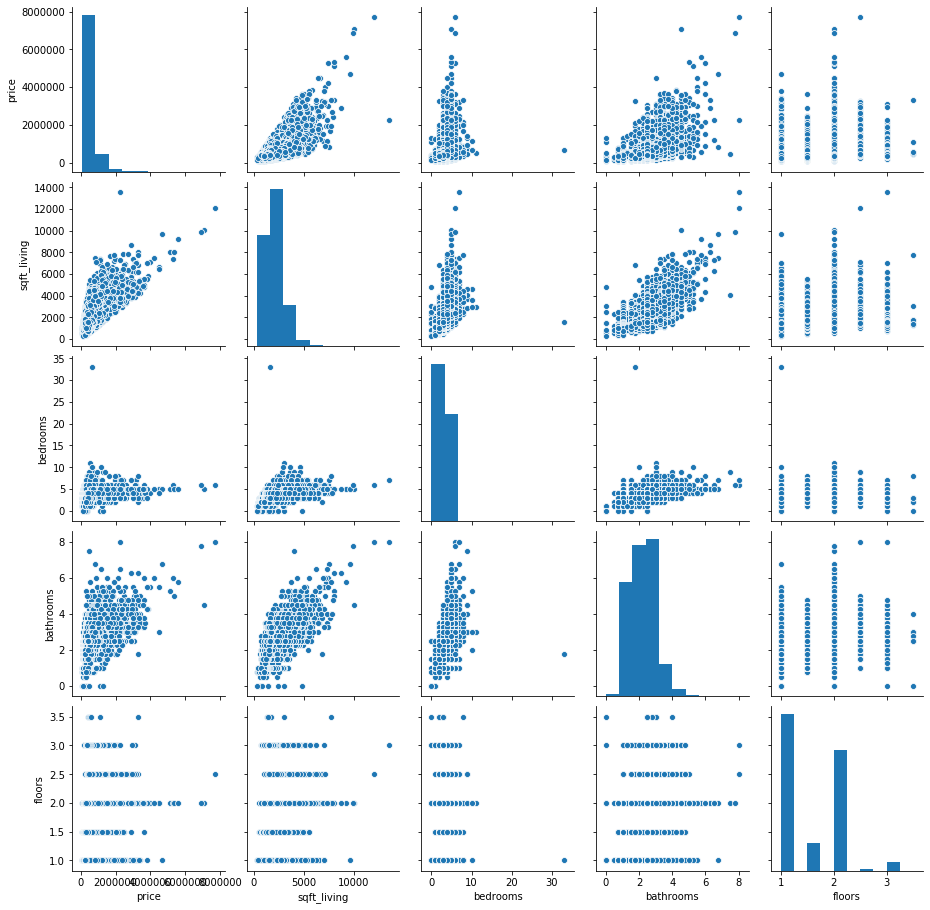

In [8]:
#Checking if the Independent variables exhibit linear relationship with the Dependent Variable
sns.pairplot(dataset)

> #### Inference: 

>From the above pairplot, the independent feature (sqft_living) and dependent feature(price) have exhibited a linear relationship. Rest other features did not showed any kind of relationship.

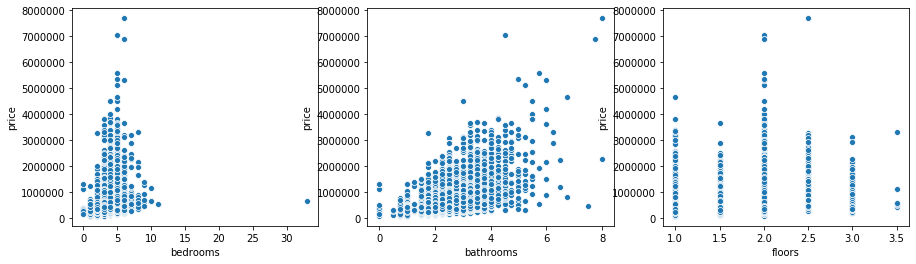

In [9]:
#Checking how squarefeet living feature is distributed among number of floors, bathrooms and bedrooms
fig = plt.figure(figsize=(15,4))

#Number of bedrooms with price
plt.subplot(1,3,1)
sns.scatterplot(x='bedrooms', y='price', data = dataset)

#Number of bathrooms with price
plt.subplot(1,3,2)
sns.scatterplot(x='bathrooms', y='price', data = dataset)

#Number of floors with price
plt.subplot(1,3,3)
sns.scatterplot(x='floors', y='price', data = dataset)

> #### Inference:<br>

> From the above graphs we conclude below inferences
>>1. Value of house is high when bedrooms are 8
>>2. Value of house is high if house has 8 bedrooms
>>3. Value of house is high if house has  2.5 floors
>>4. The plots show that there might be presence of outliers in features

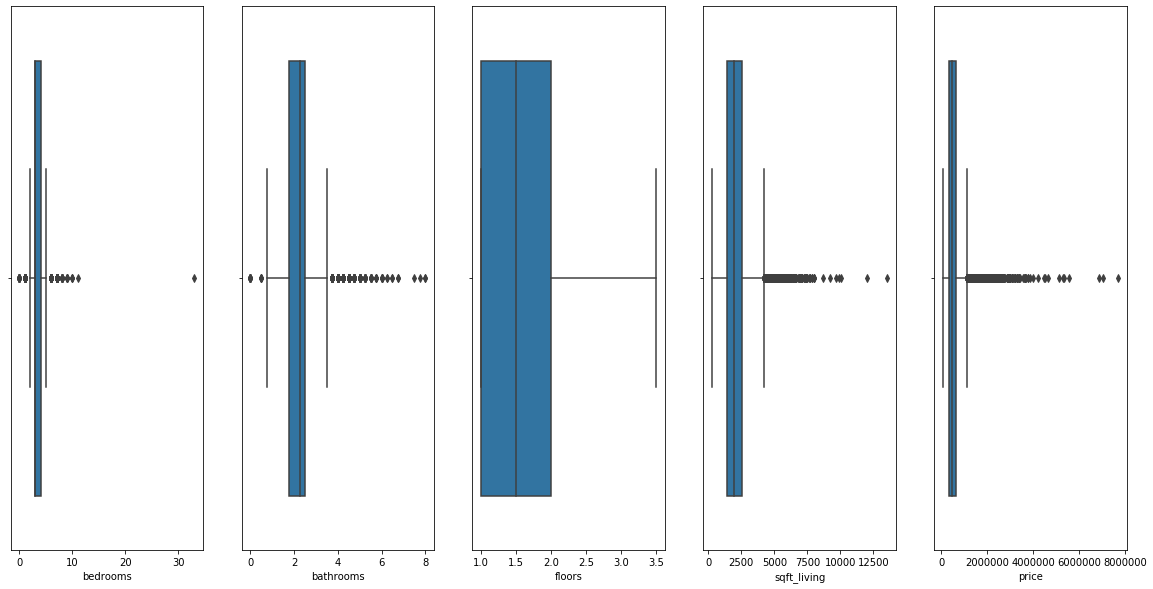

In [10]:
#Check the outliers using boxplot

fig = plt.figure(figsize=(20,10))

plt.subplot(1,5,1)
sns.boxplot(x='bedrooms',data=dataset)

plt.subplot(1,5,2)
sns.boxplot(x='bathrooms',data=dataset)

plt.subplot(1,5,3)
sns.boxplot(x='floors',data=dataset)

plt.subplot(1,5,4)
sns.boxplot(x='sqft_living',data=dataset)

plt.subplot(1,5,5)
sns.boxplot(x='price',data=dataset)

> #### Inferences:<br>

> 1. From the above box plots, except floors feature, all other features have outliers<br>
> 2. Outliers dramatically affect the regression model, meaning the coefficients of the model are very sensitive to the presence of outliers. Therefore, one approach could be to remove them to get reliable estimates for the bulk of the data.

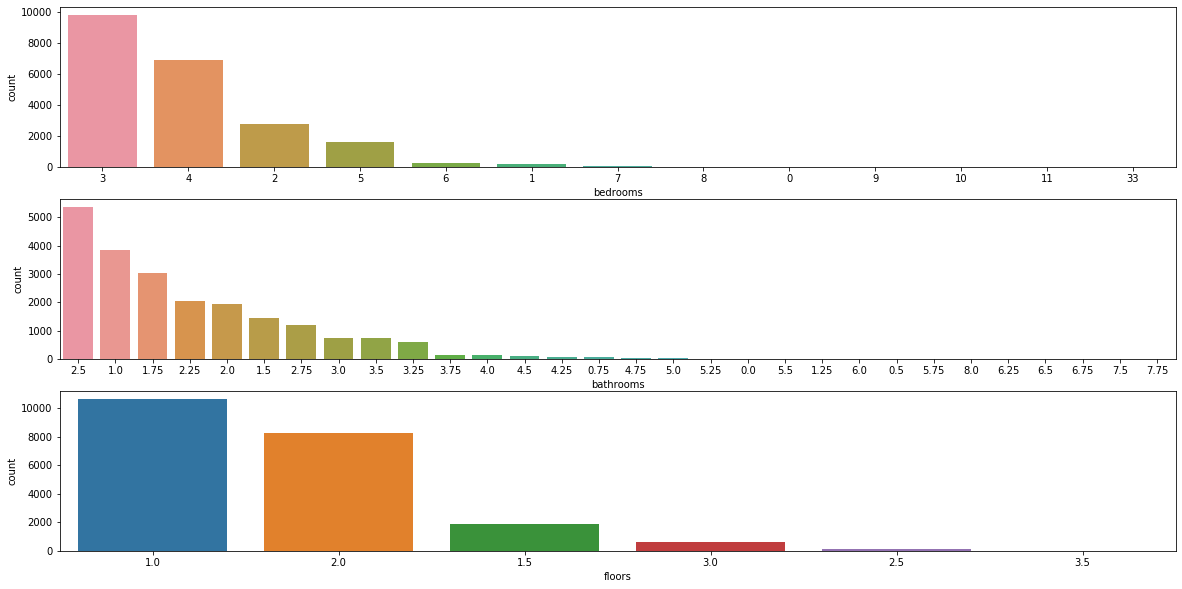

In [11]:
#Plotting the countplots on bedrooms, bathrooms and floors
fig = plt.figure(figsize=(20,10))

plt.subplot(3,1,1)
sns.countplot(x= dataset['bedrooms'],order=dataset['bedrooms'].value_counts().index)

plt.subplot(3,1,2)
sns.countplot(x= dataset['bathrooms'],order=dataset['bathrooms'].value_counts().index)

plt.subplot(3,1,3)
sns.countplot(x= dataset['floors'],order=dataset['floors'].value_counts().index)

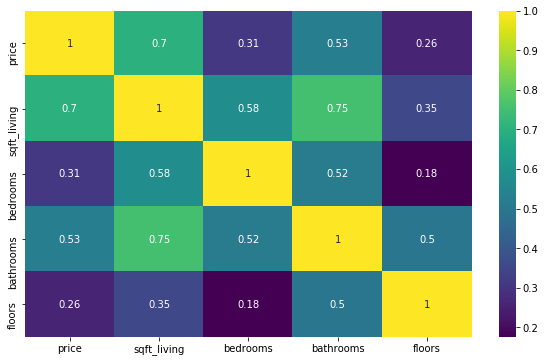

In [12]:
#Checking the multicollinearity between the features using heatmap
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='viridis')

> #### Inference:<br>
1. Correlation between bathrooms and sqft_living feature is highest
2. Correlation between bedrooms and floors features is lowest
3. If price of house is taken, the correlation with sqft_living feature is high
4. Similarly, the correlation of price of house with floors feature is low

No handles with labels found to put in legend.


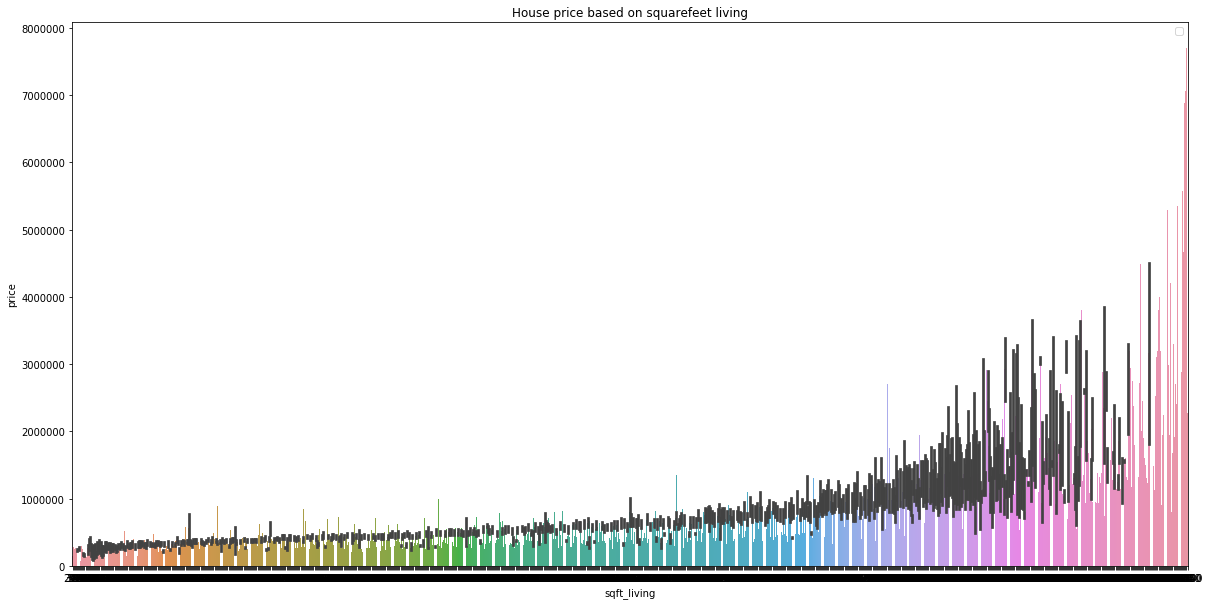

In [13]:
#A barplot between square feet for living and price to see how price changes with sqft_living feature
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
plt.title("House price based on squarefeet living")
plt.xlabel("Sqft_Living")
plt.ylabel("House Price")
plt.legend()
sns.barplot(x='sqft_living',y='price',data=dataset)

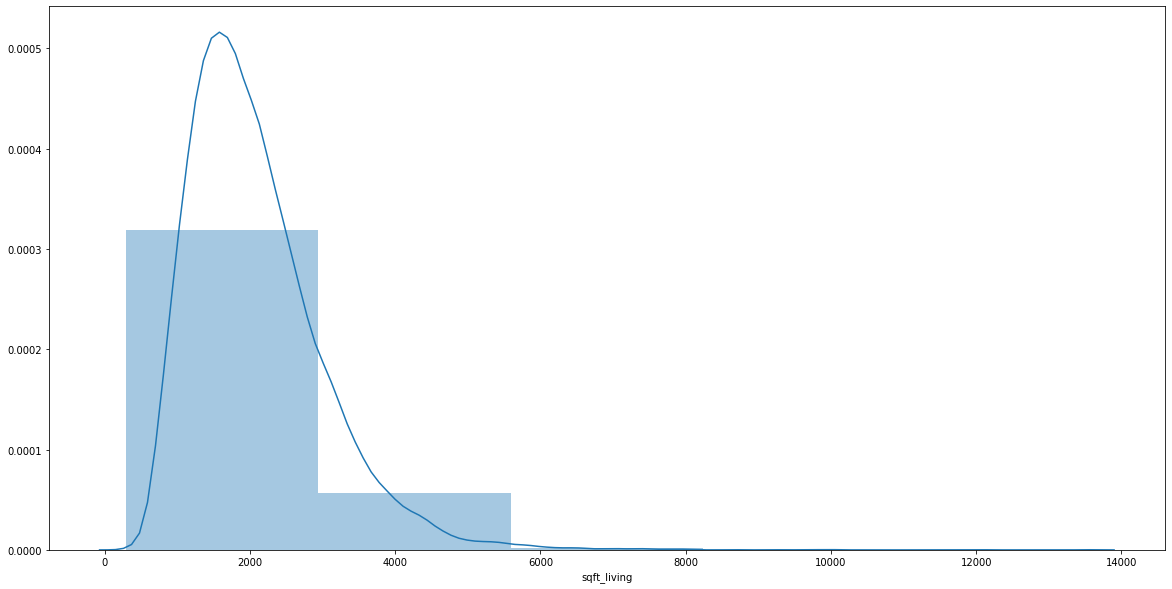

In [14]:
#A distplot of sqft_living feature to see if data is skewed or not
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
sns.distplot(dataset['sqft_living'], bins=5, kde=True, hist=True, rug=False, norm_hist=True, label='Sqft_Living')

## 5. Building the suitable models

> ### 5.1 Simple regression models

> #### 5.1.1 Building the model between price as dependent variable and sqft_living as independent variable

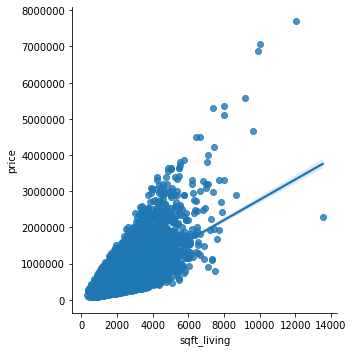

In [15]:
#A linear regression model plot between sqft_living and price of house
sns.lmplot(x='sqft_living', y='price', data=dataset, )

In [16]:
#Building the model

#Assign the X and y variables
X = dataset['sqft_living']
y = dataset['price']

#Reshaping the arrays from 1-D Array to 2-D Array before fitting model
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Create the model and train the model using training data
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Printing the Intercept and Coeffcients of model
print("Intercept of the above model: ", model_1.intercept_)
print()
print("Coefficents of the above model: ", model_1.coef_)
print()
print("Equation is: ", "y= ",model_1.intercept_, "+",model_1.coef_,"* X")

Intercept of the above model:  [-35970.9576422]

Coefficents of the above model:  [[276.40848144]]

Equation is:  y=  [-35970.9576422] + [[276.40848144]] * X


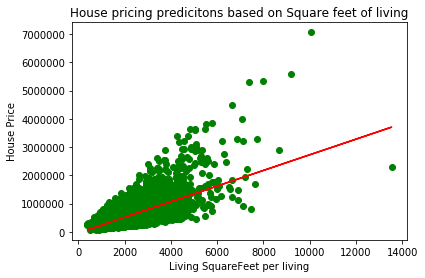

In [18]:
#predicting the model and plotting the graph of true vs predicted
y_pred = model_1.predict(X_test)
plt.scatter(X_test, y_test, c='green')
plt.plot(X_test, model_1.predict(X_test), c='red')
plt.xlabel('Living SquareFeet per living')
plt.ylabel('House Price')
plt.title('House pricing predicitons based on Square feet of living')
plt.show()

In [19]:
#Evaluating performance
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error is: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error is: ", rmse)
r2 = metrics.explained_variance_score(y_test, y_pred)
print("Variance: ", r2)

Mean Absolute Error:  177308.8305880646
Mean Squared Error is:  76715225672.70908
Root Mean Square Error is:  276975.1354773729
Variance:  0.48772973087197413


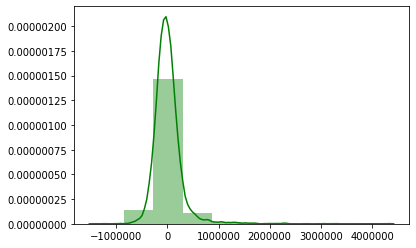

In [20]:
sns.distplot((y_test - y_pred), bins=10, color='green')

#### Inferences:<br>
1. From above performance models, the model built on data which is free from outliers is less when compared to model trained on original data. We can infer that outliers in features has no influence or significance on performance of model
2. The intercept value is found to be negative value(-38096.66231647). This means expected value of dependent variable will be less than zero when all independent variables are set to zero.
3. The cofficient value is found to be 278.19915393 which implies that an amount of 278 dollars will be multiplied and added per one square feet of area
4. The R2 value is found to be 0.51 which infers that a change in one unit of sqft_living feature brings 58.01 percentage change in price.
5. As per the business standards, the RMS value is too high which implies that the above model is not good or require more features other than sqft_living feature to predict the model effectievely

>#### 5.1.2  Building the model between price as dependent variable and number of bedrooms as independent variable

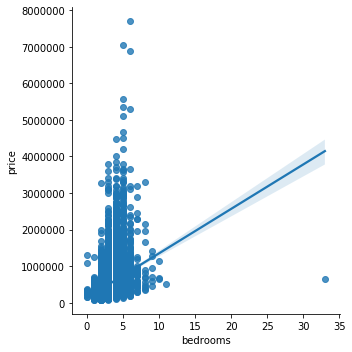

In [21]:
#A linear regression model plot between sqft_living and price of house
sns.lmplot(x='bedrooms', y='price', data=dataset)

In [22]:
#Building the model

#Assign the X and y variables
X = dataset['bedrooms']
y = dataset['price']

#Reshaping the arrays from 1-D Array to 2-D Array before fitting model
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Create the model and train the model using training data
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#Printing the Intercept and Coeffcients of model
print("Intercept of the above model: ", model_2.intercept_)
print()
print("Coefficents of the above model: ", model_2.coef_)
print()
print("Equation is: ", "y= ",model_2.intercept_, "+",model_2.coef_,"* X")

Intercept of the above model:  [144489.02884878]

Coefficents of the above model:  [[116786.65052641]]

Equation is:  y=  [144489.02884878] + [[116786.65052641]] * X


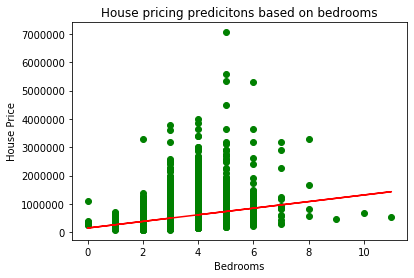

In [24]:
#predicting the model and plotting the graph of true vs predicted
#predicting the model and plotting the graph of true vs predicted
plt.scatter(X_test, y_test, c='green')
plt.plot(X_test, model_2.predict(X_test), c='red')
plt.xlabel('Bedrooms')
plt.ylabel('House Price')
plt.title('House pricing predicitons based on bedrooms')
plt.show()

In [25]:
#Evaluating performance
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error is: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error is: ", rmse)
r2 = metrics.explained_variance_score(y_test, y_pred)
print("Variance: ", r2)

Mean Absolute Error:  177308.8305880646
Mean Squared Error is:  76715225672.70908
Root Mean Square Error is:  276975.1354773729
Variance:  0.48772973087197413


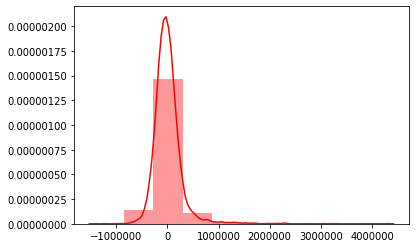

In [26]:
sns.distplot((y_test - y_pred), bins=10, color='red')

>#### Inferences:<br>
1. The intercept value in this case 117230.64433856 which implies an amount of 1lakh 17thousand dollars is minimum investment that a customer should put to get 2BHK house.
2. The coffiecient value in this case is 125416.12970167 which implies that additional 1lakh 25thousand dollars will be added per increase in the bedrooms size.
3. The r2 value is found to be 0.08 which is poorly correlated with pricing prediction. Maybe we should go for multiple regression analysis

>#### 5.1.3 Building the model between price as dependent variable and number of bathrooms as independent variable

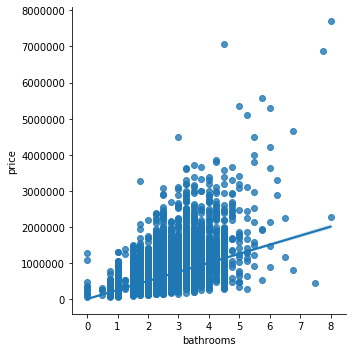

In [27]:
#A linear regression model plot between sqft_living and price of house
sns.lmplot(x='bathrooms', y='price', data=dataset)

In [28]:
#Building the model
#Assign the X and y variables
X = dataset['bathrooms']
y = dataset['price']

#Reshaping the arrays from 1-D Array to 2-D Array before fitting model
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Create the model and train the model using training data
model_3 = LinearRegression()
model_3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#Printing the Intercept and Coeffcients of model
print("Intercept of the above model: ", model_3.intercept_)
print()
print("Coefficents of the above model: ", model_3.coef_)
print()
print("Equation is: ", "y= ",model_3.intercept_, "+",model_3.coef_,"* X")

Intercept of the above model:  [16068.77803984]

Coefficents of the above model:  [[246883.42809468]]

Equation is:  y=  [16068.77803984] + [[246883.42809468]] * X


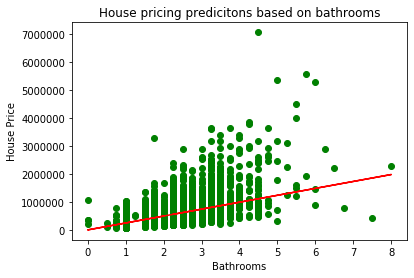

In [30]:
#predicting the model and plotting the graph of true vs predicted
plt.scatter(X_test, y_test, c='green')
plt.plot(X_test, model_3.predict(X_test), c='red')
plt.xlabel('Bathrooms')
plt.ylabel('House Price')
plt.title('House pricing predicitons based on bathrooms')
plt.show()

In [31]:
#Evaluating performance
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error is: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error is: ", rmse)
r2 = metrics.explained_variance_score(y_test, y_pred)
print("Variance: ", r2)

Mean Absolute Error:  177308.8305880646
Mean Squared Error is:  76715225672.70908
Root Mean Square Error is:  276975.1354773729
Variance:  0.48772973087197413


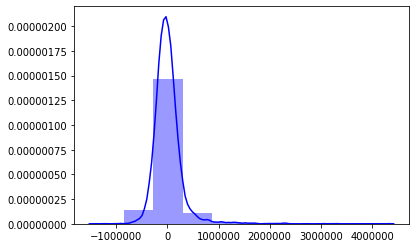

In [32]:
sns.distplot((y_test - y_pred), bins=10, color='blue')

>#### Inferences:<br>
1. The intercept value in this case 24136.42772142 which implies an amount of 24thousand dollars is minimum investment that a customer should put to get a house with minimum number of bathrooms.
2. The coffiecient value in this case is 243659.99119854 which implies that additional 2lakh 43thousand dollars will be added per increase in the bathrooms size.
3. The r2 value is found to be 0.3 which is poorly correlated with pricing prediction. Maybe we should go for multiple regression analysis

>#### 5.1.4 Building the model between price as dependent variable and number of floors as independent variable

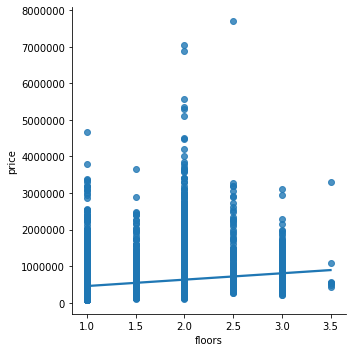

In [33]:
#A linear regression model plot between floors and price of house
sns.lmplot(x='floors', y='price', data=dataset)

In [34]:
#Building the model 

#Assign the X and y variables
X = dataset['floors']
y = dataset['price']

#Reshaping the arrays from 1-D Array to 2-D Array before fitting model
X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Create the model and train the model using training data
model_4 = LinearRegression()
model_4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#Printing the Intercept and Coeffcients of model
print("Intercept of the above model: ", model_4.intercept_)
print()
print("Coefficents of the above model: ", model_4.coef_)
print()
print("Equation is: ", "y= ",model_4.intercept_, "+",model_4.coef_,"* X")

Intercept of the above model:  [285395.03533727]

Coefficents of the above model:  [[168371.19931431]]

Equation is:  y=  [285395.03533727] + [[168371.19931431]] * X


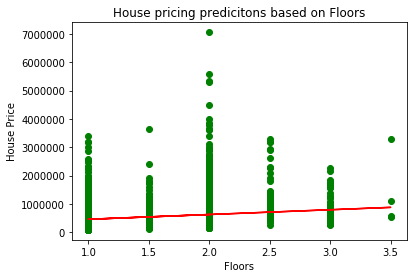

In [36]:
plt.scatter(X_test, y_test, c='green')
plt.plot(X_test, model_4.predict(X_test), c='red')
plt.xlabel('Floors')
plt.ylabel('House Price')
plt.title('House pricing predicitons based on Floors')
plt.show()

In [37]:
#Evaluating performance
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error is: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error is: ", rmse)
r2 = metrics.explained_variance_score(y_test, y_pred)
print("Variance: ", r2)

Mean Absolute Error:  177308.8305880646
Mean Squared Error is:  76715225672.70908
Root Mean Square Error is:  276975.1354773729
Variance:  0.48772973087197413


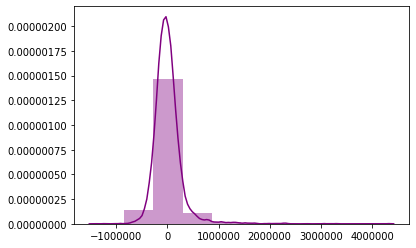

In [38]:
sns.distplot((y_test - y_pred), bins=10, color='purple')

>#### Inferences:<br>
1. The intercept value in this case 280942 which implies an amount of 2lakh 80thousand dollars is minimum investment that a customer should put to get a house with floors.
2. The coffiecient value in this case is 173040 which implies that additional 1lakh 73thousand dollars will be added per unit increase in the floors size.
3. The r2 value is found to be 0.06 which is poorly correlated with pricing prediction. Maybe we should go for multiple regression analysis.

In [39]:
#creating a table of performance metrics of above four Simple regression models
index = ['Intercept','Coeffcient','R2']


data = {
    'Price Vs SqftLiving': [model_1.intercept_, model_1.coef_, 0.49],
    'Price Vs Bedrooms': [model_2.intercept_, model_2.coef_, 0.006],
    'Price Vs Bathrooms': [model_3.intercept_, model_3.coef_, 0.002],
    'Price Vs Floors': [model_4.intercept_, model_4.coef_, 0.18],
}

table_models = pd.DataFrame(data=data, index=index)
table_models

,Price Vs SqftLiving,Price Vs Bedrooms,Price Vs Bathrooms,Price Vs Floors
Intercept,[-35970.95764219889],[144489.02884877805],[16068.778039838071],[285395.03533726855]
Coeffcient,[[276.4084814446517]],[[116786.65052640664]],[[246883.42809467946]],[[168371.19931430713]]
R2,0.49,0.006,0.002,0.18


#### Inferences:<br>
>The models developed for Price with Square feet living and price with bathrooms are significant on house pricing  and other two features(bedrooms and floors) are not that much significant on price of house.

>### 5.2  Multiple regression models

>#### 5.2.1 Building model for all independent variables with dependent variable

In [40]:
#Building the model 

#Assign the X and y variables
X = dataset[['floors','bathrooms','bedrooms','sqft_living']]
y = dataset['price']

#Split the dataset to  the test and training data in 80-20 ratio and set random state as 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fit the model
model_5 = LinearRegression()
model_5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Printing the Intercept and Coeffcients of model
print("Intercept of the above model: ", model_5.intercept_)
print()
print("Coefficents of the above model: ", model_5.coef_)
print()
print("Equation is:\n")
print("y=", model_5.intercept_, "+",model_5.coef_[0],"* (sqft_living) ","+", model_5.coef_[1],"* (bathrooms)", "+",model_5.coef_[2],"* (bedrooms)","+", model_5.coef_[3],"*(floors)")

Intercept of the above model:  72064.05786133418

Coefficents of the above model:  [  -568.02627749  12514.13322889 -54532.0672692     300.50453236]

Equation is:

y= 72064.05786133418 + -568.0262774865197 * (sqft_living)  + 12514.133228888219 * (bathrooms) + -54532.06726919893 * (bedrooms) + 300.50453235683017 *(floors)


In [42]:
#Evaluating performance
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error is: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Square Error is: ", rmse)
r2 = metrics.explained_variance_score(y_test, y_pred)
print("Variance: ", r2)

Mean Absolute Error:  177308.8305880646
Mean Squared Error is:  76715225672.70908
Root Mean Square Error is:  276975.1354773729
Variance:  0.48772973087197413


## 6. Conclusions and Recommendations

1. From the above regression analysis, we can conclude that regression modelling is not a great idea for this case study
2. Out of above regression models, the model built between the sqft_living and price of house features has highest when compared to other models
3. RMSE values for all models are too high which says that regression is not best choice for modelling
4. Polynomial Regression with degree 2 or 3 model is highly recommended to enhance the better results.